<a href="https://colab.research.google.com/github/keirajp/Ai-Minor-Project-Ai-For-Market-Trend-Analysis-/blob/main/Car_Sale_Potential_on_Gender_base_over_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Combined Gender-based car sales forecast (Female/Male):
             Female    Male
Expiry Year                
2020          968.0  1452.0
2021         1004.0  1506.0
2022         1072.0  1608.0
2023         1096.0  1644.0
2024         1124.0  1686.0


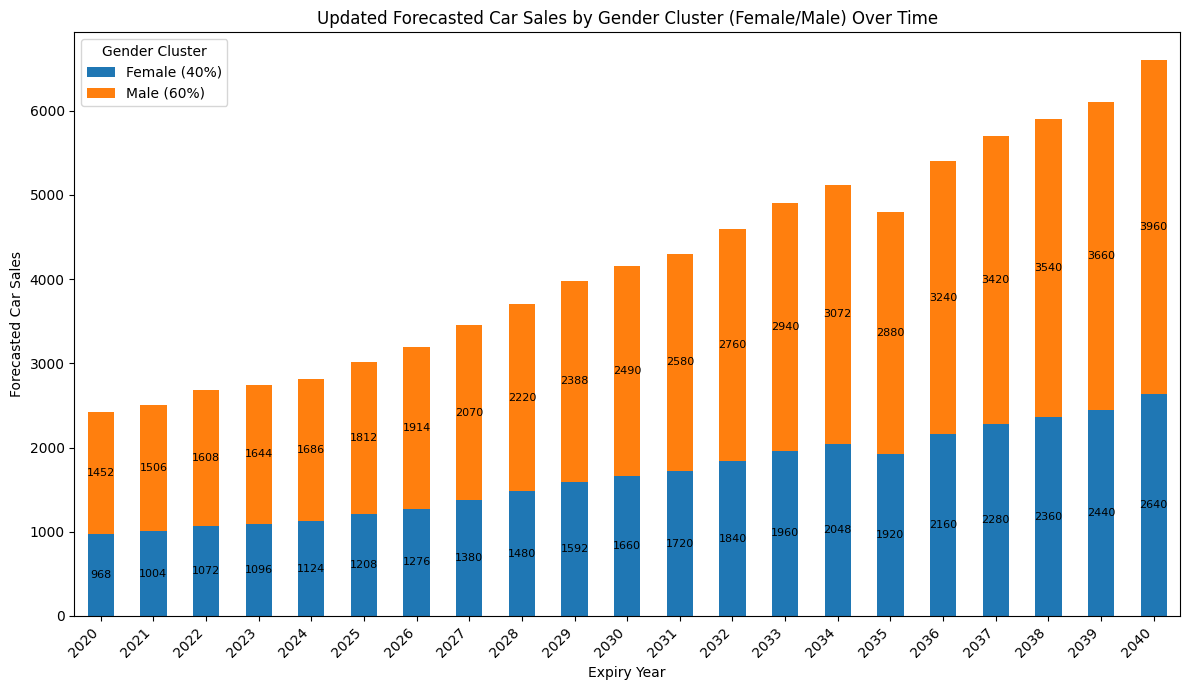

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the Excel file into a DataFrame
df = pd.read_excel('/content/Himachal Base File.csv File.xlsx')

# 2. Calculate Car Expiry Years
df['Expiry Year'] = df['Registration Year'] + 15

# 3. Project Expiring Cars Over Time
expiring_cars_by_year = df.groupby('Expiry Year')[' New CarRegistered Counts'].sum()

# 4. Define new gender distribution
new_gender_distribution = {
    'Female': 0.40,
    'Male': 0.60
}

# 5. Recalculate the car sales forecast for new gender clusters
new_gender_sales_forecast = pd.DataFrame(index=expiring_cars_by_year.index)

for gender, percentage in new_gender_distribution.items():
    new_gender_sales_forecast[gender] = expiring_cars_by_year * percentage

print("Combined Gender-based car sales forecast (Female/Male):")
print(new_gender_sales_forecast.head())

# 6. Visualize Updated Sales Forecast (Male/Female)
# Create a stacked bar chart for the new gender sales forecast
ax_combined = new_gender_sales_forecast.plot(kind='bar', stacked=True, figsize=(12, 7))

# Set labels and title
plt.xlabel('Expiry Year')
plt.ylabel('Forecasted Car Sales')
plt.title('Updated Forecasted Car Sales by Gender Cluster (Female/Male) Over Time')

# Add legend with percentages
legend_labels = [f"{gender} ({int(percentage*100)}%)" for gender, percentage in new_gender_distribution.items()]
plt.legend(title='Gender Cluster', labels=legend_labels)

# Add value labels on top of the bars for each segment
for container in ax_combined.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0: # Only label non-zero bars
            ax_combined.text(bar.get_x() + bar.get_width() / 2, # x-position: center of the bar
                             bar.get_y() + height / 2,        # y-position: center of the bar height
                             f'{int(height)}',                # text to display
                             ha='center', va='center',        # horizontal and vertical alignment
                             color='black',                   # text color for contrast
                             fontsize=8)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()